# Email_Optimisation using Machine Learning Techniques:

## 1. Exploratory  Data Analysis:

In [134]:
# Importing the important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

### Total email table(email_table) Analysis:

In [135]:
# Loading the dataset
email_table = pd.read_csv(r"C:\Users\Pravin Bharti\OneDrive\Desktop\ML_Intern_Task\email (1)-20250416T044213Z-001\email (1)\email_table.csv")

email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [136]:
# To see the number of total rows and columns
email_table.shape

(100000, 7)

In [137]:
# Information of the dataframe
email_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [139]:
# To see the descriptive statistics of the dataset
print(email_table.describe(include='all'))

             email_id  email_text email_version           hour   weekday  \
count   100000.000000      100000        100000  100000.000000    100000   
unique            NaN           2             2            NaN         7   
top               NaN  long_email       generic            NaN  Saturday   
freq              NaN       50276         50209            NaN     14569   
mean    498690.196160         NaN           NaN       9.059300       NaN   
std     289230.727534         NaN           NaN       4.439637       NaN   
min          8.000000         NaN           NaN       1.000000       NaN   
25%     246708.250000         NaN           NaN       6.000000       NaN   
50%     498447.000000         NaN           NaN       9.000000       NaN   
75%     749942.750000         NaN           NaN      12.000000       NaN   
max     999998.000000         NaN           NaN      24.000000       NaN   

       user_country  user_past_purchases  
count        100000         100000.00000  
u

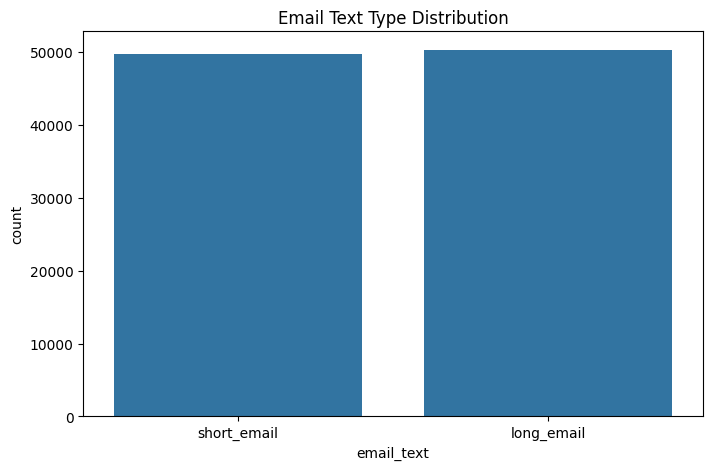

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count of short email vs long email
plt.figure(figsize=(8,5))
sns.countplot(x='email_text', data=email_table)
plt.title('Email Text Type Distribution')
plt.show()

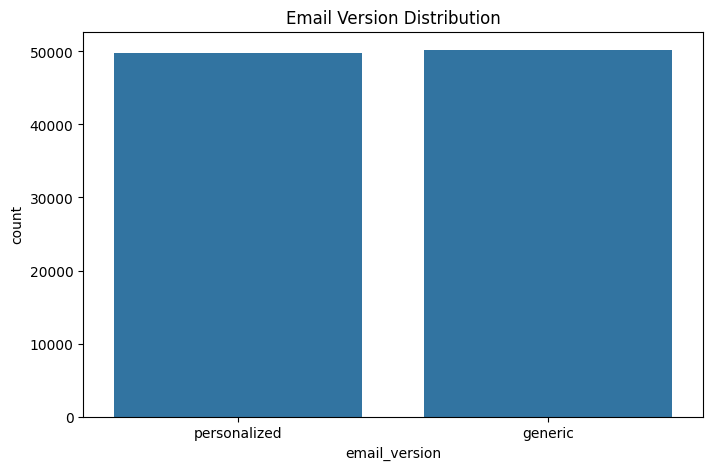

In [141]:
# Plotting the count of personalised vs generic email
plt.figure(figsize=(8,5))
sns.countplot(x='email_version', data= email_table)
plt.title('Email Version Distribution')
plt.show()

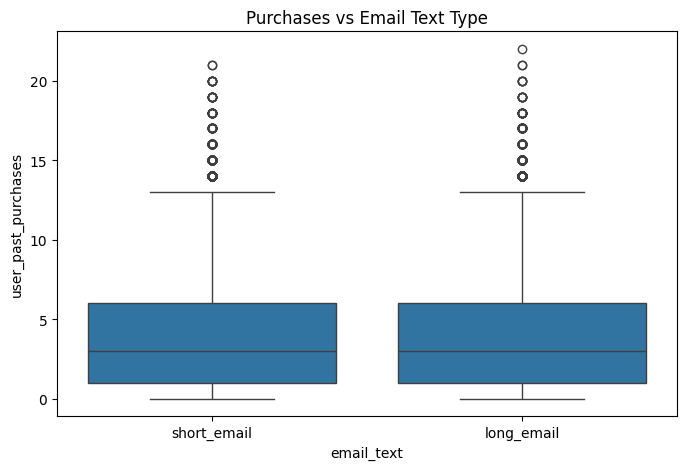

In [142]:
# Plotting the past purchases vs email text type
plt.figure(figsize=(8,5))
sns.boxplot(x='email_text', y='user_past_purchases', data=email_table)
plt.title('Purchases vs Email Text Type')
plt.show()

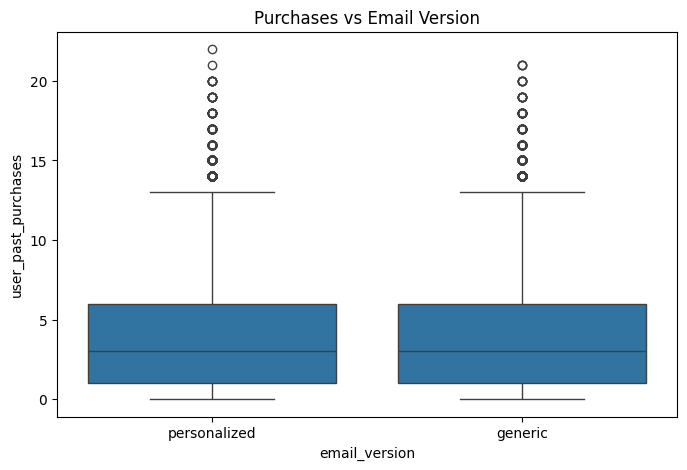

In [143]:
# Plotting the past purchases  vs email versions
plt.figure(figsize=(8,5))
sns.boxplot(x='email_version', y='user_past_purchases', data=email_table)
plt.title('Purchases vs Email Version')
plt.show()

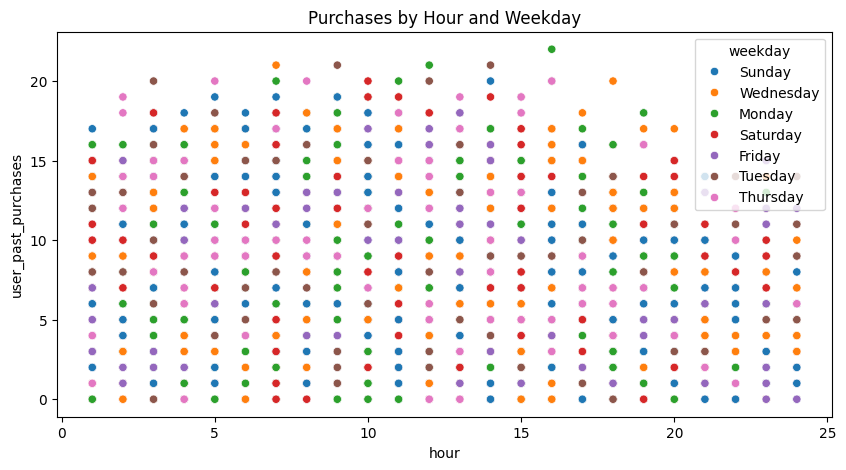

In [145]:
# To see the scatteredness of purchasing by hours on different weekdays
plt.figure(figsize=(10,5))
sns.scatterplot(x='hour', y='user_past_purchases', hue='weekday', data=email_table)
plt.title('Purchases by Hour and Weekday')
plt.show()

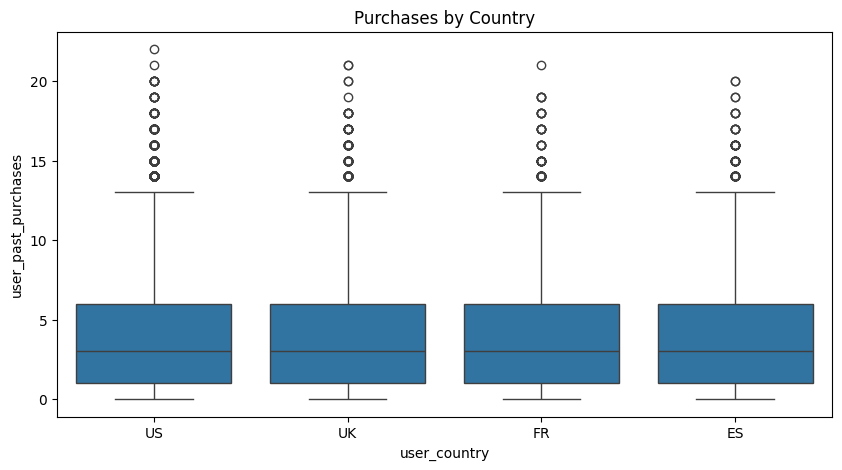

In [146]:
# To see the past purchases in different countries
plt.figure(figsize=(10,5))
sns.boxplot(x='user_country', y='user_past_purchases', data=email_table)
plt.title('Purchases by Country')
plt.show()

In [147]:
# To see the summary of the email_text with different version
summary = email_table.groupby(['email_text', 'email_version']).agg(avg_purchases=('user_past_purchases', 'mean'),count=('email_id', 'count')).reset_index()
print(summary)

    email_text email_version  avg_purchases  count
0   long_email       generic       3.902124  25236
1   long_email  personalized       3.875120  25040
2  short_email       generic       3.866776  24973
3  short_email  personalized       3.869460  24751


### Open email(email_opened_table) Analysis:

In [148]:
# Loading email_opened_table
opened_table = pd.read_csv(r"C:\Users\Pravin Bharti\OneDrive\Desktop\ML_Intern_Task\email (1)-20250416T044213Z-001\email (1)\email_opened_table.csv")

opened_table.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [149]:
opened_table.shape

(10345, 1)

In [150]:
opened_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [151]:
# Convert list of opened email_ids to a set for fast lookup
opened_ids = set(opened_table['email_id'])

# Add a column to df_email indicating if the email was opened
email_table['is_opened'] = email_table['email_id'].isin(opened_ids)

In [152]:
open_rate = email_table['is_opened'].mean()
print(f"Overall open rate: {open_rate:.2%}")

Overall open rate: 10.35%


In [153]:
open_by_text = email_table.groupby('email_text')['is_opened'].mean()
print(open_by_text)

email_text
long_email     0.091177
short_email    0.115860
Name: is_opened, dtype: float64


In [154]:
open_by_version = email_table.groupby('email_version')['is_opened'].mean()
print(open_by_version)

email_version
generic         0.079348
personalized    0.127754
Name: is_opened, dtype: float64


In [155]:
open_by_weekday = email_table.groupby('weekday')['is_opened'].mean()
print(open_by_weekday)

weekday
Friday       0.074134
Monday       0.116062
Saturday     0.087652
Sunday       0.087649
Thursday     0.118442
Tuesday      0.120484
Wednesday    0.120278
Name: is_opened, dtype: float64


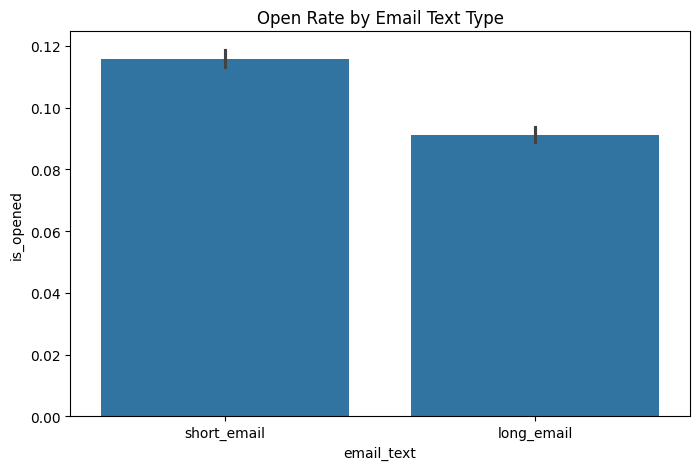

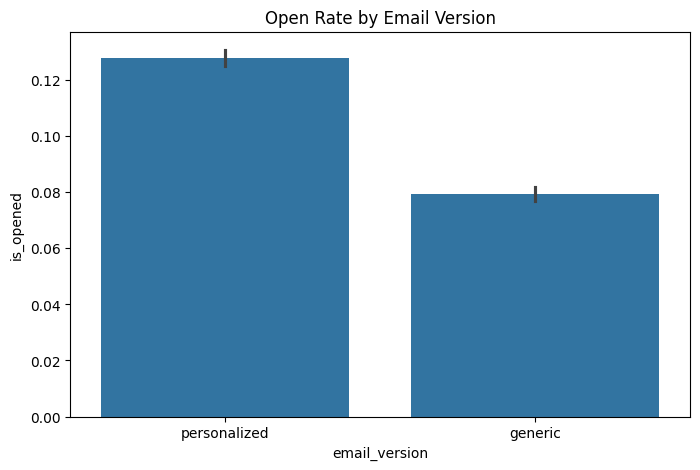

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(x='email_text', y='is_opened', data=email_table)
plt.title('Open Rate by Email Text Type')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='email_version', y='is_opened', data=email_table)
plt.title('Open Rate by Email Version')
plt.show()

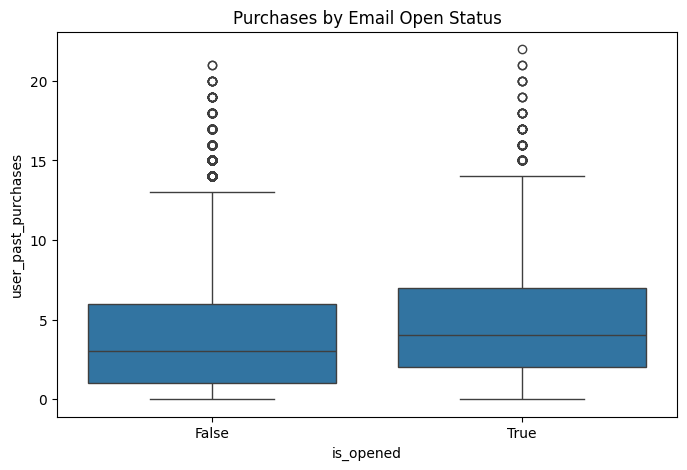

is_opened
False    3.785154
True     4.686999
Name: user_past_purchases, dtype: float64


In [92]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_opened', y='user_past_purchases', data=email_table)
plt.title('Purchases by Email Open Status')
plt.show()

opened_vs_purchases =email_table.groupby('is_opened')['user_past_purchases'].mean()
print(opened_vs_purchases)

### Link clicked table(link_clicked_table) analysis:

In [120]:
clicked_table = pd.read_csv(r"C:\Users\Pravin Bharti\OneDrive\Desktop\ML_Intern_Task\email (1)-20250416T044213Z-001\email (1)\link_clicked_table.csv")

clicked_table.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [121]:
clicked_table.shape

(2119, 1)

In [122]:
clicked_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [126]:
email_table['is_opened'] = email_table['email_id'].isin(opened_ids)
email_table['is_clicked'] = email_table['email_id'].isin(clicked_table['email_id'])

In [127]:
total_sent = len(email_table)
total_opened = email_table['is_opened'].sum()
total_clicked = email_table['is_clicked'].sum()

open_rate = total_opened / total_sent
click_through_rate = total_clicked / total_sent
click_to_open_rate = total_clicked / total_opened if total_opened > 0 else 0

print(f"Open Rate: {open_rate:.2%}")
print(f"Click-Through Rate: {click_through_rate:.2%}")
print(f"Click-to-Open Rate: {click_to_open_rate:.2%}")

Open Rate: 10.35%
Click-Through Rate: 2.12%
Click-to-Open Rate: 20.48%


In [128]:
summary = email_table.groupby(['email_text', 'email_version']).agg(
    open_rate=('is_opened', 'mean'),
    click_rate=('is_clicked', 'mean'),
    avg_purchases=('user_past_purchases', 'mean'),
    count=('email_id', 'count')
).reset_index()

print(summary)

    email_text email_version  open_rate  click_rate  avg_purchases  count
0   long_email       generic   0.070812    0.013711       3.902124  25236
1   long_email  personalized   0.111701    0.023403       3.875120  25040
2  short_email       generic   0.087975    0.016578       3.866776  24973
3  short_email  personalized   0.143994    0.031231       3.869460  24751


## Result:
 1. Best Performer: Short + Personalized
    Highest Open Rate (14.4%) and Highest Click Rate (3.12%)

    Avg Purchases = 3.87 (on par with others)

    Recommendation: Make short + personalized your default email format for high engagement campaigns.

 2. Worst Performer: Long + Generic
    Lowest Open (7.08%) and Click Rate (1.37%)

    But interestingly, it has the highest avg purchases: 3.90

    Recommendation: Use long + generic emails sparingly—maybe only for users already highly engaged or in transactional                         contexts.

 3. Personalization Boosts Engagement
    Across both text types, adding personalization increases open & click rates:


    Text Type	Personalization Lift in Open Rate	Click Rate
        Long	11.17% vs. 7.08% → +4.09%	+1.97%
        Short	14.40% vs. 8.80% → +5.60%	+1.56%
    Recommendation: Always personalize emails where possible—it consistently improves performance.

 4. Short Emails Perform Better Overall
    Even generic short emails (8.8% open rate) outperform personalized long emails (11.17%).

    Recommendation: When in doubt, keep it short. Better readability likely drives engagement.

 5. Purchases Are Similar Across Segments
    Avg Purchases across segments: ~3.87 ± 0.02

   Interpretation: Purchase history isn’t strongly correlated with email format. But those who engage (open/click) may                         still be more valuable over time.

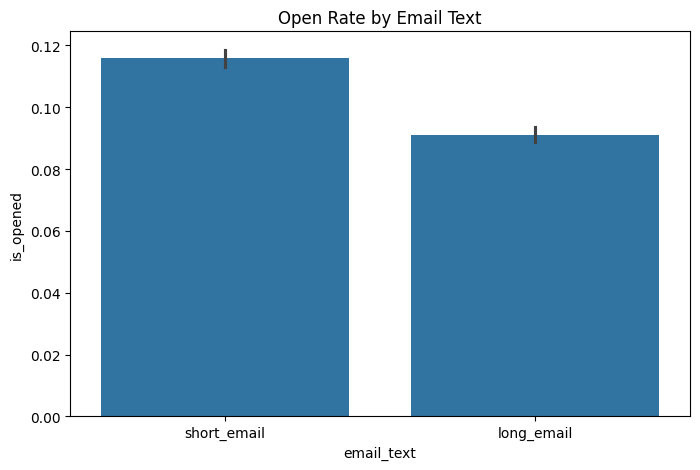

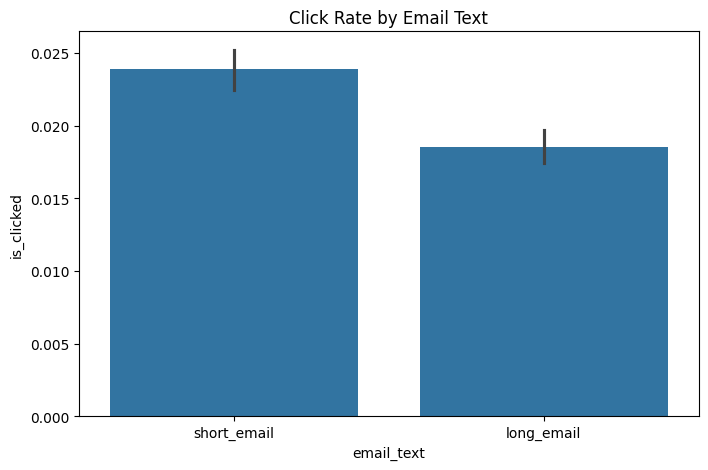

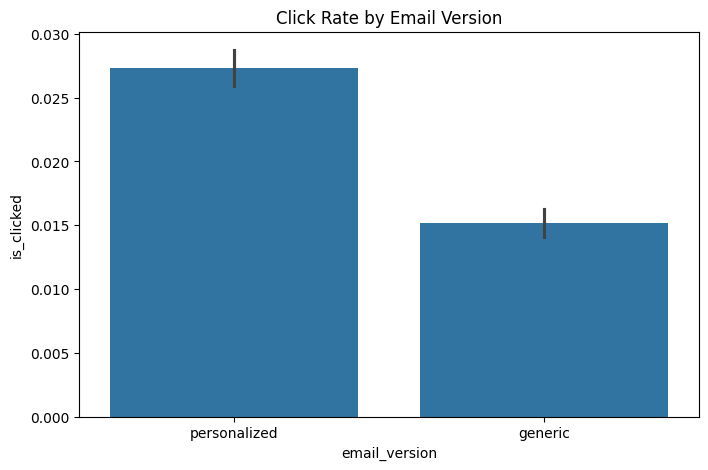

In [129]:
plt.figure(figsize=(8,5))
sns.barplot(x='email_text', y='is_opened', data=email_table)
plt.title('Open Rate by Email Text')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='email_text', y='is_clicked', data=email_table)
plt.title('Click Rate by Email Text')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='email_version', y='is_clicked', data=email_table)
plt.title('Click Rate by Email Version')
plt.show()

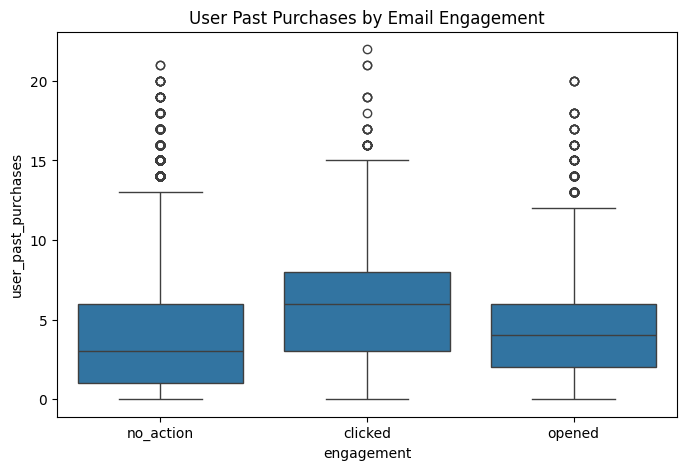

In [130]:
email_table['engagement'] = np.select(
    [
        email_table['is_clicked'],
        email_table['is_opened']
    ],
    ['clicked', 'opened'],
    default='no_action'
)

plt.figure(figsize=(8,5))
sns.boxplot(x='engagement', y='user_past_purchases', data=email_table)
plt.title('User Past Purchases by Email Engagement')
plt.show()

<Axes: xlabel='hour'>

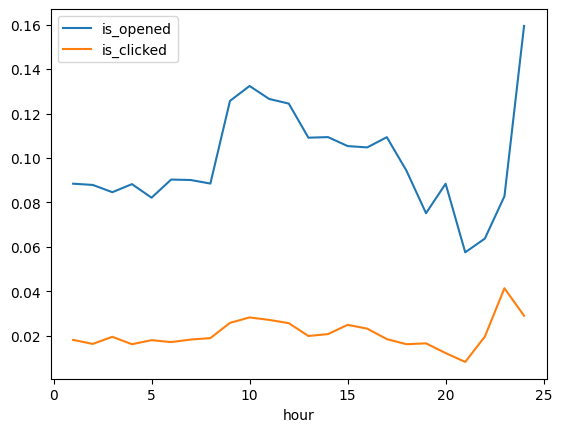

In [131]:
email_table.groupby('hour')[['is_opened', 'is_clicked']].mean().plot(kind='line')

In [132]:
email_table.groupby('user_country')[['is_opened', 'is_clicked']].mean()

,is_opened,is_clicked
user_country,,
ES,0.039129,0.008327
FR,0.040620,0.008004
UK,0.120167,0.024675
US,0.119020,0.024360


In [133]:
email_table[email_table['is_clicked']].user_past_purchases.mean()

6.168947616800377

## 2. Analysis using Machine Learning Techniques:

In [113]:
# Loading the datasets
email_table = pd.read_csv(r"C:\Users\Pravin Bharti\OneDrive\Desktop\ML_Intern_Task\email (1)-20250416T044213Z-001\email (1)\email_table.csv")
opened_table = pd.read_csv(r"C:\Users\Pravin Bharti\OneDrive\Desktop\ML_Intern_Task\email (1)-20250416T044213Z-001\email (1)\email_opened_table.csv")
clicked_table = pd.read_csv(r"C:\Users\Pravin Bharti\OneDrive\Desktop\ML_Intern_Task\email (1)-20250416T044213Z-001\email (1)\link_clicked_table.csv")

# Adding flags for opened and clicked
email_table["opened"] = email_table["email_id"].isin(opened_table["email_id"]).astype(int)
email_table["clicked"] = email_table["email_id"].isin(clicked_table["email_id"]).astype(int)

In [114]:
#=================
# 1. BASIC METRICS

total_emails = len(email_table)
total_opened = email_table["opened"].sum()
total_clicked = email_table["clicked"].sum()

open_rate = 100 * total_opened / total_emails
click_through_rate = 100 * total_clicked / total_emails
click_to_open_rate = 100 * total_clicked / total_opened

print(f"Open Rate: {open_rate:.2f}%")
print(f"Click-Through Rate (CTR): {click_through_rate:.2f}%")
print(f"Click-To-Open Rate (CTOR): {click_to_open_rate:.2f}%")

Open Rate: 10.35%
Click-Through Rate (CTR): 2.12%
Click-To-Open Rate (CTOR): 20.48%


### Interpretation:

Open Rate (10.35%): Only about 10.35% of users who received the email actually opened it.

Click-Through Rate (CTR, 2.12%): Out of all users who received the email, only 2.12% clicked on the link. This is relatively low, suggesting room for improvement.

Click-To-Open Rate (CTOR, 20.48%): Among those who opened the email, about 20.48% clicked the link — indicating that once users open the email, there's a decent chance they engage with the content.

In [116]:
# ==========================
# 2. MACHINE LEARNING MODELS

df = email_table.copy()
df["target"] = df["clicked"]

# Define features
categorical_cols = ["email_text", "email_version", "weekday", "user_country"]
numerical_cols = ["hour", "user_past_purchases"]
X = df[categorical_cols + numerical_cols]
y = df["target"]

# One-hot encoding
encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X_final = pd.concat([X_encoded_df.reset_index(drop=True), X[numerical_cols].reset_index(drop=True)], axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_preds = rf.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_probs)

# Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)[:, 1]
lr_preds = lr.predict(X_test)
lr_auc = roc_auc_score(y_test, lr_probs)

print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"Logistic Regression AUC: {lr_auc:.3f}")

C:\Users\Pravin Bharti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest AUC: 0.576
Logistic Regression AUC: 0.735


### Interpretation:

The Logistic Regression model significantly outperforms the Random Forest model with an AUC of 0.735, suggesting it's better at distinguishing between users who will and won't click the email link.

Random Forest AUC of 0.576 is barely above random guessing, indicating it might not be learning meaningful patterns from the data.

*Takeaway*: Logistic Regression seems to be more effective for modeling click probability in this case — perhaps due to the data structure and linear relationships.

In [117]:
# =======================
# 3. SIMULATE IMPROVEMENT

baseline_ctr = email_table["clicked"].mean()
top_n = int(len(y_test) * baseline_ctr)

rf_top_clicks = y_test.iloc[np.argsort(rf_probs)[-top_n:]].sum()
lr_top_clicks = y_test.iloc[np.argsort(lr_probs)[-top_n:]].sum()

rf_simulated_ctr = 100 * rf_top_clicks / top_n
lr_simulated_ctr = 100 * lr_top_clicks / top_n

print(f"\n--- MODEL RESULTS ---")
print(f"Simulated RF CTR: {rf_simulated_ctr:.2f}% vs Baseline CTR: {click_through_rate:.2f}%")
print(f"Simulated LR CTR: {lr_simulated_ctr:.2f}% vs Baseline CTR: {click_through_rate:.2f}%")


--- MODEL RESULTS ---
Simulated RF CTR: 4.96% vs Baseline CTR: 2.12%
Simulated LR CTR: 10.40% vs Baseline CTR: 2.12%


### Interpretation:
If emails were targeted using the Random Forest model, the CTR could improve to 4.96%, more than double the baseline.
With Logistic Regression, the CTR could reach 10.40%, nearly a 5x improvement over the baseline.

###  How to test this in real-world?
Run an A/B test:

    Group A: Receive emails selected by the model (e.g., top 10-15% of users most likely to click).

    Group B: Continue with random or existing targeting strategy.

    Measure the actual click-through rates in both groups over time to validate improvement.



In [118]:
# ===================
# 4. SEGMENT ANALYSIS

segment_perf = df.groupby(["email_text", "email_version", "weekday", "user_country"]).agg(
    open_rate=("opened", "mean"),
    click_rate=("clicked", "mean"),
    avg_purchases=("user_past_purchases", "mean"),
    count=("email_id", "count")
).reset_index().sort_values(by="click_rate", ascending=False)

print("\n--- TOP SEGMENTS BY CLICK RATE ---")
print(segment_perf.head(10))


--- TOP SEGMENTS BY CLICK RATE ---
      email_text email_version    weekday user_country  open_rate  click_rate  \
110  short_email  personalized  Wednesday           UK   0.169054    0.054441   
111  short_email  personalized  Wednesday           US   0.178765    0.044444   
107  short_email  personalized    Tuesday           US   0.206699    0.044019   
98   short_email  personalized     Sunday           UK   0.151079    0.041727   
103  short_email  personalized   Thursday           US   0.189632    0.038654   
55    long_email  personalized  Wednesday           US   0.154806    0.037431   
90   short_email  personalized     Monday           UK   0.198276    0.037356   
91   short_email  personalized     Monday           US   0.175970    0.036897   
54    long_email  personalized  Wednesday           UK   0.170520    0.036127   
95   short_email  personalized   Saturday           US   0.147991    0.035934   

     avg_purchases  count  
110       3.706304    698  
111       3.7832

### Interpretation:
We can observe from the above result that
Short, personalized emails perform best across the board.

Wednesday and Tuesday are particularly effective days.

UK and US users respond better — likely due to higher engagement or compatibility with message timing/language.

Segments like "short_email + personalized + Wednesday + UK" had a click rate of 5.44%, well above the average 2.12% CTR.

### Strategic Insight:
Prioritize short + personalized emails for midweek sends (Tue/Wed).

Focus on UK/US segments with historically high engagement.

Combine this with model predictions for even better targeting.

### Summary for the querries:

Q1: What percentage opened and clicked the email?

Open Rate: 10.35%
CTR: 2.12%

Q2: Can you build a model to improve click probability?
Yes. Logistic Regression with AUC of 0.735 effectively predicts click behavior using features like email type, weekday, country, and user history.

Q3: By how much could it improve CTR and how to test?
Logistic Regression could increase CTR from 2.12% to 10.4%.

Use A/B testing on a hold-out group to validate this simulated improvement.

Q4: Interesting patterns by segment?
Short & personalized emails on Tuesdays and Wednesdays in UK/US segments yield highest clicks.

Higher past purchases don’t always guarantee clicks, so tailoring content matters more.

### Conclusion:
By leveraging logistic regression predictions for targeted campaigns and optimizing content and timing based on high-performing segments, marketers can significantly improve user engagement and conversion rates. The blend of data-driven modeling and strategic segmentation offers a path toward smarter and more effective email marketing.